In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
# %load ../helper_funcs/get_df.py
def get_df(yr):
    return pd.read_csv("../../inputs/Environmental_Data_Deep_Moor_{}.csv".format(yr))

In [8]:
# %load ../helper_funcs/get_seasons.py
def get_seasons(yr):
    df = get_df(yr)
    return [df[df['date'].between('{}_03_20'.format(yr),'{}_06_19'.format(yr))],
            df[df['date'].between('{}_06_20'.format(yr),'{}_09_21'.format(yr))],
            df[df['date'].between('{}_09_22'.format(yr),'{}_12_20'.format(yr))],
            df[~df['date'].between('{}_03_20'.format(yr),'{}_12_20'.format(yr))]]

In [10]:
seasons = ["Spring","Summer","Fall","Winter"]
heights = [season['Air_Temp'].mean() for season in get_seasons('2013')]

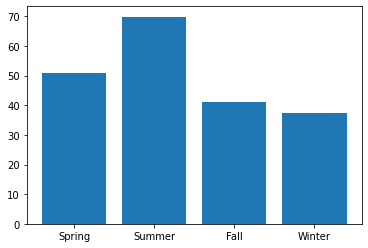

In [12]:
plt.bar(seasons,heights)
plt.show()

In [15]:
# get height of each of the bars. Opacity of the bars will be calculated in proportion to
    # their heights, with the tallest bar being fully opaque
alphas = [height/max(heights) for height in heights]
colors = [(0.1, 0.7,0.2,a) for a in alphas]

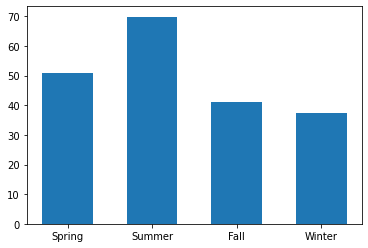

In [16]:
plt.bar(seasons,heights, 0.6) # decrease width of bars to 0.6
plt.show()

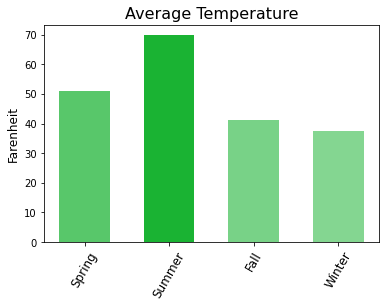

In [17]:
plt.bar(seasons,heights, 0.6, color = colors)
plt.ylabel('Farenheit', fontsize = 12)
plt.title('Average Temperature', fontsize=16)
plt.xticks(rotation = 60, fontsize = 12)
plt.show()

In [19]:
# compare to a different year
heights14 = [season['Air_Temp'].mean() for season in get_seasons('2014')]
alphas14 = [height/max(heights) for height in heights14]
colors14 = [(0.2,0.1,0.7,a) for a in alphas14]

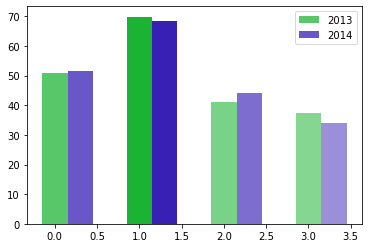

In [20]:
index = np.arange(4)
fig, ax = plt.subplots()
rects1 = ax.bar(index, heights, 0.3, color = colors, label = '2013')
rects2 = ax.bar(index+0.3, heights14, 0.3, color=colors14, label = '2014')
ax.legend()
plt.show()